# 1. Import and Install Dependencies

In [87]:
!pip install tensorflow
!pip install opencv-python 
!pip install mediapipe 
!pip install scikit-learn
!pip install matplotlib


In [88]:
import cv2
import numpy as np #help us work with different arrays later on and structure datasets
import os
from matplotlib import pyplot as plt #helps visualize images
import time #sleep between frames
import mediapipe as mp #machine learning

# 2. Keypoints using MP Holistic

In [89]:
mp_drawing = mp.solutions.drawing_utils #drawing utils
mp_holistic = mp.solutions.holistic #Holistic model

In [90]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #color conversion
    image.flags.writeable = False                  #image no longer writeable
    results = model.process(image)                # make prediction
    image.flags.writeable = True                  #image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion back
    return image,results                             

In [91]:
#image and results from the mediapipe and use them
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [92]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,10,20),thickness=1,circle_radius = 1),#dot color
                             mp_drawing.DrawingSpec(color=(220,10,90),thickness=1,circle_radius = 1)) #connection color
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(40,10,210),thickness=2,circle_radius = 4),#dot color
                             mp_drawing.DrawingSpec(color=(230,10,90),thickness=2,circle_radius = 4)) #connection color)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,10,230),thickness=2,circle_radius = 4),#dot color
                             mp_drawing.DrawingSpec(color=(220,20,190),thickness=2,circle_radius = 4)) #connection color)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(40,20,20),thickness=2,circle_radius = 4),#dot color
                             mp_drawing.DrawingSpec(color=(220,20,90),thickness=2,circle_radius = 4)) #connection color)

In [93]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.8,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read feed
        ret, frame = cap.read()
        #make predictions
        image,results = mediapipe_detection(frame,holistic)
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image, results)
        #show on screen
        cv2.imshow('OpenCV Feed', image)
        #break on command
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [94]:
len(results.face_landmarks.landmark)

468

In [95]:
draw_styled_landmarks(frame,results)

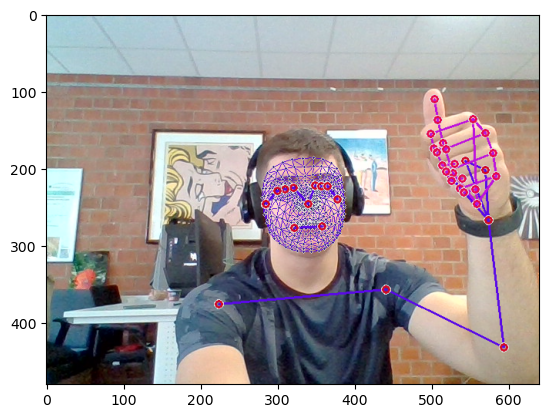

In [96]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3.Extract Keypoint Values

In [97]:
results.face_landmarks

landmark {
  x: 0.534835
  y: 0.55336833
  z: -0.0238871276
}
landmark {
  x: 0.533962309
  y: 0.518560112
  z: -0.0383143686
}
landmark {
  x: 0.533460081
  y: 0.531200469
  z: -0.0217008237
}
landmark {
  x: 0.524929881
  y: 0.48963362
  z: -0.02696977
}
landmark {
  x: 0.53336215
  y: 0.508373559
  z: -0.0400410779
}
landmark {
  x: 0.532046378
  y: 0.496448666
  z: -0.036379151
}
landmark {
  x: 0.528393686
  y: 0.469383121
  z: -0.0147496415
}
landmark {
  x: 0.476920903
  y: 0.478444785
  z: 0.0091668386
}
landmark {
  x: 0.526520669
  y: 0.451127172
  z: -0.00864780322
}
landmark {
  x: 0.525747061
  y: 0.438503742
  z: -0.00896727
}
landmark {
  x: 0.52159363
  y: 0.389957428
  z: 0.00338292983
}
landmark {
  x: 0.535099447
  y: 0.558338046
  z: -0.0233006552
}
landmark {
  x: 0.535094619
  y: 0.562071383
  z: -0.0211757049
}
landmark {
  x: 0.534903049
  y: 0.563612044
  z: -0.0182181783
}
landmark {
  x: 0.535320222
  y: 0.566234648
  z: -0.0181931723
}
landmark {
  x: 0.5356

In [98]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [99]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for  res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.z] for  res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z] for  res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for  res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [100]:
result_test = extract_keypoints(results)

In [101]:
result_test

array([ 0.53202999,  0.51449728, -0.5379113 , ...,  0.        ,
        0.        ,  0.        ])

In [82]:
np.save('0',result_test)

# 4. Setup Folders for Collection

In [103]:
#path for our exported data which essentially is a numpy array
DATA_PATH = os.path.join('MP_Data')

#actions we will try to detect
actions = np.array(['hello','eating','iloveyou'])
#thirty videos worth of data
no_sequences = 30
#every video will be 30 frames long
sequence_length = 30

shto sakame da naravime vo segmentot podole e da zachuvame broj na folderi kolku shto ni e dolga nizata actions,
za sekoj od tie folderi da se napravat po 30 videa so po 30 frames

hello
    1
    2
    3
    ..30
thanks
    1
    2
    ..30
iloveyou...

In [104]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5.Collect Keypoint Values for Training and Testing

In [105]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5,min_tracking_confidence=0.5) as holistic:
    #NEW LOOP
    #loop through actions
    for action in actions:
        #loop through sequences aka videos
        for sequence in range(no_sequences):
            #loop through length of video or the number of frames
            for frame_num in range(sequence_length):
            
                #read feed
                ret, frame = cap.read()
                #make predictions
                image,results = mediapipe_detection(frame,holistic)
                print(results)
        
                #Draw landmarks
                draw_styled_landmarks(image, results)
        
                # NEW apply collection logic
                if frame_num == 0:
                    cv2.putText(image,'START COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'COLLECTION FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),1,cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'COLLECTION FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),1,cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                #NEW export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action, str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #show on screen
                cv2.imshow('OpenCV Feed', image)
                #break on command
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 6.Preprocess Data and Create Labels and Features

In [106]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [107]:
label_map = {label:num for num,label in enumerate(actions)}

In [108]:
label_map

{'hello': 0, 'eating': 1, 'iloveyou': 2}

In [109]:
#za da gi sobereme site informacii od npy arrays vo edna golema niza podeleni kako novi delovi sekoja , 90 videa kje ima 
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action, str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [110]:
np.array(sequences).shape
#mozhe da se vidi deka imame 3D numpy array koja e sostavena od 90 videa, 30 frames za sekoe video i po 1662 landmarks za sekoj frame

(90, 30, 1662)

In [111]:
np.array(labels).shape

(90,)

In [112]:
X = np.array(sequences)

In [113]:
X.shape

(90, 30, 1662)

kje koristime to_categorical to one-hot encode it

In [114]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [115]:
y = to_categorical(labels).astype(int)

In [116]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [118]:
X_train.shape

(85, 30, 1662)

In [119]:
y_train.shape

(85, 3)

In [120]:
X_test.shape

(5, 30, 1662)

In [121]:
y_test.shape

(5, 3)

# 7. BUild and Train LSTM Neural Network

In [122]:
from tensorflow.keras.models import Sequential #this is going to allow us to build a sequential neural network
from tensorflow.keras.layers import LSTM,Dense # temporal component to building neural network and allows us to performa action detection
from tensorflow.keras.callbacks import TensorBoard #for logging 

In [123]:
#log directory 
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [124]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, activation = 'relu' , input_shape = (30,1662)))
model.add(LSTM(128,return_sequences=True, activation = 'relu'))
model.add(LSTM(64,return_sequences=False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense (32, activation = 'relu'))
model.add(Dense(actions.shape[0],activation='softmax')) #kje ni dade za site vrsdnosti probability chiv zbir == 1 ,
                                                        #ako kazhe 0.7 0.1 0.2 , znacci deka e prvata akcija to est "hello"

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [125]:
actions.shape[0] #3 neural network units

3

In [126]:
res = [0.2,.7,.1]

In [127]:
actions[np.argmax(res)]

'eating'

In [128]:
#mora da go koristime categorical crossentopy koga imame multiclass classification model
#ako imavle binary classifcation model mozhe da koristime binary cross entropy
#ako imavme so regresija kje beshe drugo
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [129]:
model.fit(X_train,y_train,epochs = 1300, callbacks = [tb_callback])

Epoch 1/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - categorical_accuracy: 0.2858 - loss: 1.4741
Epoch 2/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.4207 - loss: 1.9242
Epoch 3/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.4051 - loss: 4.6118
Epoch 4/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3523 - loss: 3.9627
Epoch 5/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.3757 - loss: 5.3060
Epoch 6/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - categorical_accuracy: 0.2720 - loss: 11.6628
Epoch 7/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.4031 - loss: 12.8263
Epoch 8/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3092 - loss: 16.3154
Epoch 9/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3679 - loss: 9.9130
Epoch 10/1300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3777 - loss: 7.3501
Epoch 11/1300
3/3 ━━━━━━━━

KeyboardInterrupt: 

In [131]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [133]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


In [134]:
res[0]

array([3.987132e-02, 9.600540e-01, 7.467793e-05], dtype=float32)

In [139]:
actions[np.argmax(res[3])]

'iloveyou'

In [140]:
actions[np.argmax(y_test[3])]

'iloveyou'

# 9. Save Weights

In [141]:
model.save('action.h5')

In [54]:
del model #koga kje go deleatneme, ideme da go izgradime, potoa da go kompajlirame i potoa ne mora da go trenirame tuku samo:

In [46]:
model.load_weights('action.h5')

# 10. Calcuaiton Using Confusion Matrix and  Accuracy

In [142]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [143]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [144]:
ytrue =  np.argmax(y_test,axis = 1).tolist()
yhat = np.argmax(yhat,axis = 1).tolist()

In [145]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[4, 0],
        [0, 1]],

       [[2, 0],
        [1, 2]],

       [[3, 1],
        [0, 1]]], dtype=int64)

In [79]:
multilabel_confusion_matrix??

Signature:
multilabel_confusion_matrix(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    labels=None,
    samplewise=False,
)
Source:   
def multilabel_confusion_matrix(
    y_true, y_pred, *, sample_weight=None, labels=None, samplewise=False
):
    """Compute a confusion matrix for each class or sample.

    .. versionadded:: 0.21

    Compute class-wise (default) or sample-wise (samplewise=True) multilabel
    confusion matrix to evaluate the accuracy of a classification, and output
    confusion matrices for each class or sample.

    In multilabel confusion matrix :math:`MCM`, the count of true negatives
    is :math:`MCM_{:,0,0}`, false negatives is :math:`MCM_{:,1,0}`,
    true positives is :math:`MCM_{:,1,1}` and false positives is
    :math:`MCM_{:,0,1}`.

    Multiclass data will be treated as if binarized under a one-vs-rest
    transformation. Returned confusion matrices will be in the order of
    sorted unique labels in the union of (y_true, y_pred).

    Read mo

In [146]:
accuracy_score(ytrue,yhat)

0.8

# 11. Test in Real Time

In [147]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [148]:
plt.imshow(prob_viz(res,actions,image,colors))

TypeError: only length-1 arrays can be converted to Python scalars

In [162]:
#1. new detection variables
sequence = [] #kje ni sobere 30 frames za da mozhe da generira prediction
sentence = [] # konkatenira istorija na predikcii
predictions = []
threshold = 0.8 #kako confidence metric

cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.8,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read feed
        ret, frame = cap.read()
        #make predictions
        image,results = mediapipe_detection(frame,holistic)
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image, results)
         
        #2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence,axis = 0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

        # 3. viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res): #dodadeno za da ne zabeguva , da se zeme samo ako poslednite 10 se isti
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) > 5:
                sentence = sentence[-5:] # da gi prikazhuva samo poslednite 5 predikcii
             # 4. viz probabilities
            image = prob_viz(res,actions,image,colors)
            cv2.rectangle(image,(0,0),(640,40),(245,117,16), -1)
            cv2.putText(image,' '.join(sentence),(3,30),
                   cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
      
                    
            
            
        #show on screen
        cv2.imshow('OpenCV Feed', image)
        #break on command
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

C:\Users\HP\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [63]:
res[np.argmax(res)]>threshold

True

In [97]:
model.predict(np.expand_dims(X_test[0],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.19696218, 0.8020076 , 0.00103023]], dtype=float32)